In [2]:
#Importando biblioteca
import pandas as pd

In [3]:
#Extraindo dados
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [6]:
#Juntando todos os arquivos
df= pd.concat([df1, df2, df3, df4, df5])

In [7]:
#Exibindo as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
#Exibindo as 5 últimas 
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
#Alterando o tipo de dados da coluna ID
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
#Consultando linhas com  valores faltantes  
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
df["Vendas"].fillna(0, inplace=True)

In [17]:
#Criando colunas novas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [21]:
#Retornando a menor
df["Receita"].min()

3.34

In [23]:
#Retornar o valor com maior quatidade
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [25]:
#Retornar o valor com menor quantidade
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [27]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
#Ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [29]:
#TRABALHANDO COM DATAS

In [30]:
#Transformando s coluna de data em tipo inteiro 
df["Data"]=df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [32]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [34]:
df["Data"] = pd.to_datetime(df["Data"])

In [35]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [36]:
#Agrupamento por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [37]:
#Criando uma coluna com ano
df["Ano_Venda"]= df["Data"].dt.year

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
87,Salvador,2019-01-01,135.19,1034,2,270.38,2019
13,Salvador,2019-02-12,39.29,1035,1,39.29,2019
182,Salvador,2019-01-02,6.60,1037,2,13.20,2019
62,Recife,2019-01-01,23.04,983,6,138.24,2019
72,Natal,2018-05-02,612.00,854,4,2448.00,2018


In [45]:
#Criando uma coluna pra identificar mês e ano
df["mes_vendas"], df["dia_venda"]=(df["Data"].dt.month, df["Data"].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_vendas,dia_venda
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1
195,Natal,2019-01-02,44.89,1036,3,134.67,2019,1,2
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019,1,1
64,Salvador,2019-01-01,37.96,1037,3,113.88,2019,1,1
13,Aracaju,2018-01-01,43.45,1522,10,434.50,2018,1,1


In [41]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
#Exibindo a diferenças de datas
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_vendas,dia_venda,diferenca_dias
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,2019,1,1,365 days
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days
135,Recife,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days
75,Natal,2019-03-30,706.00,854,2,1412.00,2019,3,30,453 days
101,Salvador,2019-01-01,32.28,1035,3,96.84,2019,1,1,365 days


In [46]:
#Criando trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_vendas,dia_venda,diferenca_dias,trimestre_venda
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days,3
181,Natal,2019-01-02,244.83,1037,2,489.66,2019,1,2,366 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,2019,3,2,425 days,1
77,Salvador,2019-01-01,218.76,1037,1,218.76,2019,1,1,365 days,1
112,Natal,2019-01-02,43.00,1036,3,129.00,2019,1,2,366 days,1


In [50]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]

In [53]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_vendas,dia_venda,diferenca_dias,trimestre_venda
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,447 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2019,3,9,432 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,2019,3,2,425 days,1


In [54]:
#VISUALIZAÇÃO DE DADOS

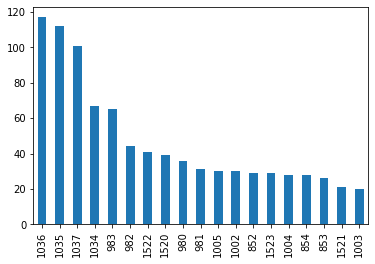

In [55]:
#Visualiza quantas linahs tem uma determinada coluna
df["LojaID"].value_counts(ascending=False).plot.bar()

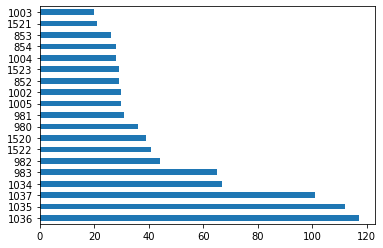

In [56]:
df["LojaID"].value_counts(ascending=False).plot.barh()

In [57]:
df["LojaID"].value_counts(ascending=False).plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7f8d11dce090>>

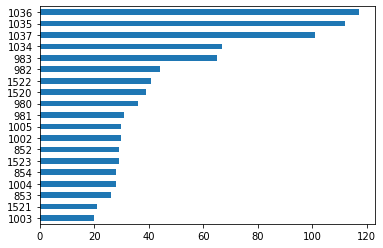

In [58]:
#Graficos de barras horizonais em ordem decrescente
df["LojaID"].value_counts(ascending=True).plot.barh();

In [59]:
#Total de vendas por cidade

In [60]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

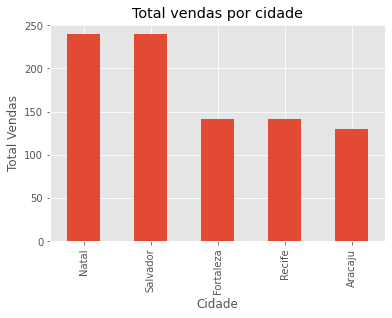

In [74]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

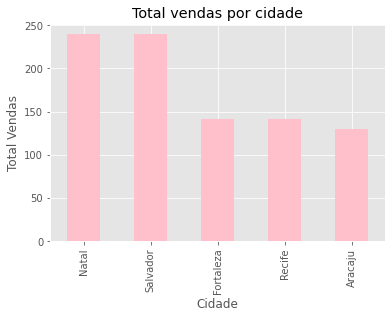

In [75]:
#Alterando cor 
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade",color= "pink")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [76]:
#Alterando o estilo
plt.style.use("ggplot")

<function matplotlib.pyplot.legend(*args, **kwargs)>

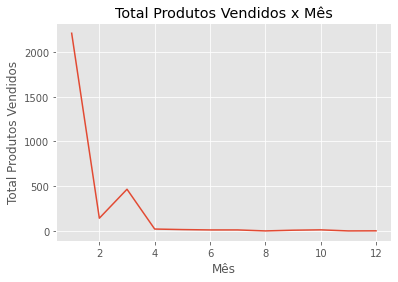

In [86]:
df.groupby(df["mes_vendas"])["Qtde"].sum().plot(title= "Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend

In [85]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [92]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [96]:
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum()

mes_vendas
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

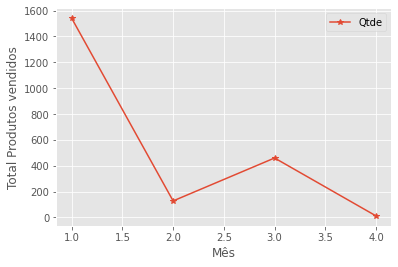

In [97]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend();

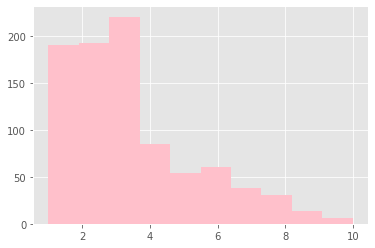

In [102]:
#Histograma
plt.hist(df["Qtde"], color = "pink");

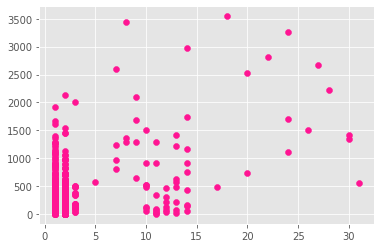

In [105]:
#Gráfico de disperção
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color = "deeppink");

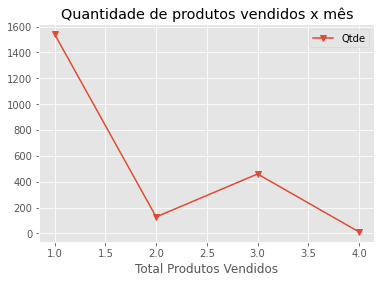

In [107]:
#Salvando em png
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês");
plt.xlabel("Mês")
plt.xlabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE X MES.png")